# Bike Sharing System Data Analysis

## Background
Bike sharing systems have gained popularity as a convenient and eco-friendly mode of transportation. These systems enable users to rent bikes from one location and return them to another. With over 500 bike-sharing programs worldwide, these systems play a significant role in traffic management, environmental sustainability, and public health.

The data generated by bike sharing systems is valuable for research purposes. Unlike other transport services, bike sharing systems record detailed information such as travel duration, departure, and arrival positions. This rich dataset can be used to analyze mobility patterns and detect important events in the city.

## Data Set
The core dataset used for this analysis is the two-year historical log from the Capital Bikeshare system in Washington D.C., USA. The dataset covers the years 2011 and 2012 and includes information on bike rentals aggregated on an hourly and daily basis. Additional weather and seasonal information is also incorporated into the dataset.

The data is publicly available from the Capital Bikeshare system website and weather information is sourced from http://www.freemeteo.com.

## Associated Tasks
This dataset lends itself to various analytical tasks, including:

- Regression: Predicting the number of bike rentals on an hourly or daily basis based on environmental and seasonal factors.
- Event and Anomaly Detection: The count of rented bikes can be correlated to specific events in the city. These events can be detected using search engine queries or external sources. Analyzing the dataset can validate anomaly detection algorithms or event detection methods.

## Files
The dataset includes the following files:

- Readme.txt
- hour.csv: Aggregated bike sharing counts on an hourly basis (17379 records)
- day.csv: Aggregated bike sharing counts on a daily basis (731 records)

## Dataset Characteristics
Both `hour.csv` and `day.csv` have the following fields, except for `hr` which is not available in `day.csv`:

- instant: Record index
- dteday: Date
- season: Season (1:spring, 2:summer, 3:fall, 4:winter)
- yr: Year (0:2011, 1:2012)
- mnth: Month (1 to 12)
- hr: Hour (0 to 23)
- holiday: Indicates if the day is a holiday or not
- weekday: Day of the week
- workingday: Indicates if the day is a working day (neither weekend nor holiday)
- weathersit:
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp: Normalized temperature in Celsius (divided by 41, maximum value)
- atemp: Normalized feeling temperature in Celsius (divided by 50, maximum value)
- hum: Normalized humidity (divided by 100, maximum value)
- windspeed: Normalized wind speed (divided by 67, maximum value)
- casual: Count of casual users
- registered: Count of registered users
- cnt: Total count of rental bikes (including both casual and registered users)

In [118]:
%matplotlib inline

In [119]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy

In [120]:
df_day = pd.read_csv('../data/day.csv')

In [121]:
df_day.shape

(731, 16)

In [122]:
df = pd.read_csv('../data/hour.csv')

In [123]:
df.shape

(17379, 17)

We will decide to continue with the hour dataset since it has more data than day.

In [124]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [125]:
df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


# Drop uneeded columns

Instant column is an index of the column for the registration index. Will drop the column because it is not needed and will use the same index for all the other columns.

The "date" or "dteday" column represents the specific date of each record in the bike sharing dataset. It is common to drop this column in certain analyses or modeling tasks for the following reasons:

Redundancy: The "date" column contains information that is already represented by other columns such as year, month, and day of the week. Including the "date" column can introduce redundancy and increase the complexity of the analysis without providing any additional meaningful information.

Non-Numeric Format: The "date" column is typically represented as a non-numeric format (e.g., yyyy-mm-dd), which may not be suitable for certain statistical or machine learning models that require numeric inputs. Removing the "date" column simplifies the dataset by keeping only the relevant numeric features.

Temporal Dependencies: In some cases, time series analysis or forecasting tasks may involve considering the temporal dependencies between data points. However, for many other analysis tasks, the specific dates themselves may not be relevant. Removing the "date" column allows us to focus on the other important variables that affect bike rental behaviors.

In [126]:
df = df.drop(['instant', 'dteday'], axis=1)

In [127]:
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [128]:
df.shape

(17379, 15)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  casual      17379 non-null  int64  
 13  registered  17379 non-null  int64  
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11)
memory usage: 2.0 MB


The provided information shows the first few rows of the dataset and its shape. The dataset has 17379 rows and 15 columns. Each column represents a specific attribute or feature, such as season, year, month, hour, holiday, weekday, workingday, weathersit, temperature, humidity, windspeed, and counts of casual, registered, and total rental bikes. The data types of the columns are mainly integers and floats.

# Fixing the data types
The variables season, yr, mnth, hr, holiday, weekday, workingday, and weathersit should be treated as categorical variables instead of integers. 

1. season: The values represent different seasons (1: spring, 2: summer, 3: fall, 4: winter). Even though the values are encoded as integers, they represent distinct categories rather than a continuous numerical scale.

2. yr: The values represent different years (0: 2011, 1: 2012). Similarly, the values indicate separate categories rather than a continuous numeric scale.

3. mnth: The values represent different months (1 to 12). While the values are represented by integers, they denote distinct categories rather than a continuous numerical sequence.

4. hr: The values represent different hours of the day (0 to 23). Although the values are represented as integers, they represent distinct time points rather than a continuous numeric scale.

5. holiday: The variable indicates whether the day is a holiday or not (0: not a holiday, 1: holiday). It is a binary categorical variable.

6. weekday: The values represent different days of the week (0: Sunday, 1: Monday, ..., 6: Saturday). Although the values are represented as integers, they correspond to distinct categories.

7. workingday: The variable indicates whether the day is a working day or not (0: not a working day, 1: working day). It is a binary categorical variable.

8. weathersit: The values represent different weather conditions (1: clear, 2: mist/cloudy, 3: light snow/rain, 4: heavy rain/snow). Although the values are encoded as integers, they represent distinct categories of weather conditions.

Treating these variables as categories instead of integers allows us to properly capture their qualitative nature and prevents any numerical assumptions or ordering that may be incorrect. By specifying them as categorical variables, we can perform appropriate statistical analysis and modeling techniques that consider the categorical nature of these variables.

In [130]:
df["season"] = df["season"].astype('category')
df["yr"] = df["yr"].astype('category')
df["mnth"] = df["mnth"].astype('category')
df["holiday"] = df["holiday"].astype('category')
df["weekday"] = df["weekday"].astype('category')
df["workingday"] = df["workingday"].astype('category')
df["weathersit"] = df["weathersit"].astype('category')


Hour of the day has a natural ordering - 9am is closer to 10am or 8am than it is to 6pm. It is best thought of as a discrete ordinal variable. We will treat it as characteristic of being cyclic.

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   yr          17379 non-null  category
 2   mnth        17379 non-null  category
 3   hr          17379 non-null  int64   
 4   holiday     17379 non-null  category
 5   weekday     17379 non-null  category
 6   workingday  17379 non-null  category
 7   weathersit  17379 non-null  category
 8   temp        17379 non-null  float64 
 9   atemp       17379 non-null  float64 
 10  hum         17379 non-null  float64 
 11  windspeed   17379 non-null  float64 
 12  casual      17379 non-null  int64   
 13  registered  17379 non-null  int64   
 14  cnt         17379 non-null  int64   
dtypes: category(7), float64(4), int64(4)
memory usage: 1.2 MB


### Checking for missing values

In [132]:
df.isna().sum()   #null value check

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No missing values. We can proceed with further analysis, modeling, and interpretation of the dataset without concerns about missing values.

In [133]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000
atemp,17379.0,0.475775,0.171850,0.00,0.3333,0.4848,0.6212,1.0000
hum,17379.0,0.627229,0.192930,0.00,0.4800,0.6300,0.7800,1.0000
windspeed,17379.0,0.190098,0.122340,0.00,0.1045,0.1940,0.2537,0.8507
casual,17379.0,35.676218,49.305030,0.00,4.0000,17.0000,48.0000,367.0000
registered,17379.0,153.786869,151.357286,0.00,34.0000,115.0000,220.0000,886.0000
cnt,17379.0,189.463088,181.387599,1.00,40.0000,142.0000,281.0000,977.0000


Hour of the day (hr) ranges from 0 to 23, with a mean of 11.55. It indicates that the data covers a full 24-hour cycle, and the distribution of bike rentals throughout the day varies.

Temperature (temp) and feeling temperature (atemp) are normalized variables ranging from 0 to 1. The mean temperature is around 0.5, indicating a moderate average temperature. The feeling temperature is slightly lower on average.

Humidity (hum) is also a normalized variable ranging from 0 to 1. The mean humidity is 0.63, indicating a moderate level of humidity on average.

Windspeed (windspeed) is a normalized variable ranging from 0 to 0.85. The mean windspeed is 0.19, suggesting a relatively calm wind environment.

The count of casual users (casual) ranges from 0 to 367, with a mean of 35.68. The count of registered users (registered) ranges from 0 to 886, with a mean of 153.79. The total count of rental bikes (cnt) ranges from 1 to 977, with a mean of 189.46. These variables represent the target variable and indicate the number of bike rentals by different user types.

This summary provide insights into the distribution and variability of the different variables in the dataset. We will further analyzed to understand patterns, trends, and relationships between the variables.

## Checking correlation with a quick correlation matrix

C:\Users\eterp\AppData\Local\Temp\ipykernel_30840\2311237572.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


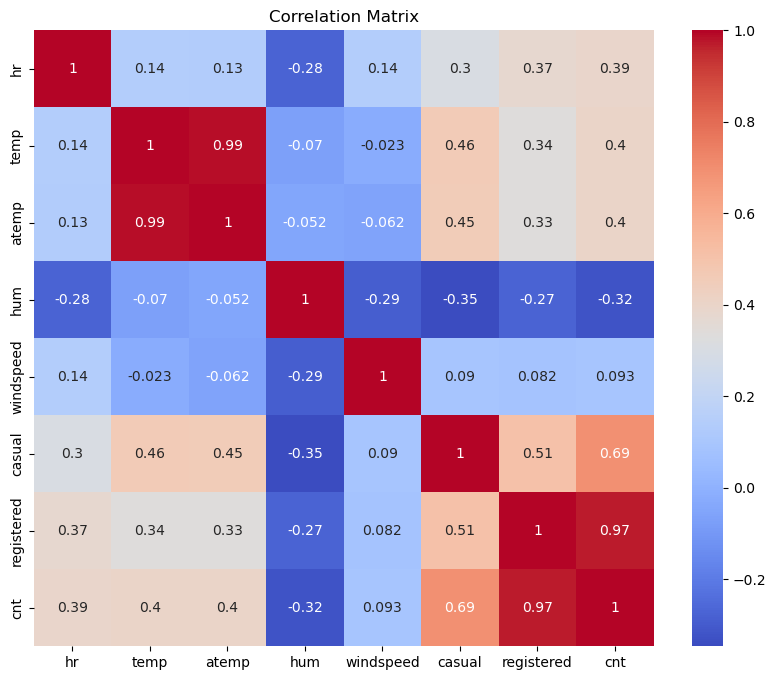

In [134]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [135]:
df = df.drop(['registered', 'casual', 'atemp'], axis=1)

In the context of the given data, dropping the "atemp", "registered" and "casual" columns can help address multicollinearity concerns.

By removing these columns, we eliminate potential redundancy or overlap in the information captured by the remaining variables. If the "registered" and "casual" columns are highly correlated with other variables in the dataset, keeping them in the analysis could introduce multicollinearity issues. This can result in unreliable coefficient estimates and inflated standard errors, making it challenging to draw accurate conclusions about the relationship between the remaining variables and the target variable.

Dropping these columns can also improve the efficiency of the analysis by reducing the dimensionality of the dataset. With fewer variables, the model becomes simpler and easier to interpret, allowing us to focus on the most relevant predictors.

We will drop 'registered', 'casual', and 'atemp' for the following reasons:

'registered': This column represents the count of registered users. Since the goal is to predict the total count of rental bikes (cnt), including both casual and registered users, keeping the 'registered' column could lead to data leakage. Data leakage occurs when information from the target variable or future data is unintentionally used during the model training process, which can result in overly optimistic performance metrics. Therefore, it is common practice to exclude this column when predicting the total count.

'casual': Similar to the 'registered' column, the 'casual' column represents the count of casual users. It is also dropped for the same reasons mentioned above.

'atemp': This column represents the normalized feeling temperature. It is being dropped because it is highly correlated with the 'temp' column, which represents the normalized temperature. Including highly correlated variables in the model can lead to multicollinearity issues, where the predictors become redundant and can negatively affect the model's performance and interpretability. Therefore, one of the correlated variables is often dropped to avoid such issues, and in this case, 'atemp' is chosen to be dropped.

By dropping these columns, the DataFrame is simplified and optimized for further analysis and modeling without the risk of data leakage or multicollinearity.

# One-hot encoding to convert categorical variables into binary vectors.

In [136]:
df_enc = pd.get_dummies(df, columns = ['season', 'weathersit'])
df_enc.head()


,yr,mnth,hr,holiday,weekday,workingday,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0,1,0,0,6,0,0.24,0.81,0.0,16,1,0,0,0,1,0,0,0
1,0,1,1,0,6,0,0.22,0.80,0.0,40,1,0,0,0,1,0,0,0
2,0,1,2,0,6,0,0.22,0.80,0.0,32,1,0,0,0,1,0,0,0
3,0,1,3,0,6,0,0.24,0.75,0.0,13,1,0,0,0,1,0,0,0
4,0,1,4,0,6,0,0.24,0.75,0.0,1,1,0,0,0,1,0,0,0


In [137]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   yr            17379 non-null  category
 1   mnth          17379 non-null  category
 2   hr            17379 non-null  int64   
 3   holiday       17379 non-null  category
 4   weekday       17379 non-null  category
 5   workingday    17379 non-null  category
 6   temp          17379 non-null  float64 
 7   hum           17379 non-null  float64 
 8   windspeed     17379 non-null  float64 
 9   cnt           17379 non-null  int64   
 10  season_1      17379 non-null  uint8   
 11  season_2      17379 non-null  uint8   
 12  season_3      17379 non-null  uint8   
 13  season_4      17379 non-null  uint8   
 14  weathersit_1  17379 non-null  uint8   
 15  weathersit_2  17379 non-null  uint8   
 16  weathersit_3  17379 non-null  uint8   
 17  weathersit_4  17379 non-null  uint8   
dtypes: cat

The updated DataFrame has 18 columns. The categorical columns ('yr', 'mnth', 'holiday', 'weekday', 'workingday') have been converted to the category data type. The 'hr' column remains as an integer, while the 'temp', 'hum', 'windspeed', and 'cnt' columns retain their original data types. One-hot encoding created additional columns ('season_1', 'season_2', 'season_3', 'season_4', 'weathersit_1', 'weathersit_2', 'weathersit_3', 'weathersit_4') representing the categories in 'season' and 'weathersit'. The memory usage has reduced to 900.7 KB.

# Univariate Analysis

C:\Users\eterp\AppData\Local\Temp\ipykernel_30840\3986122725.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_enc.corr()


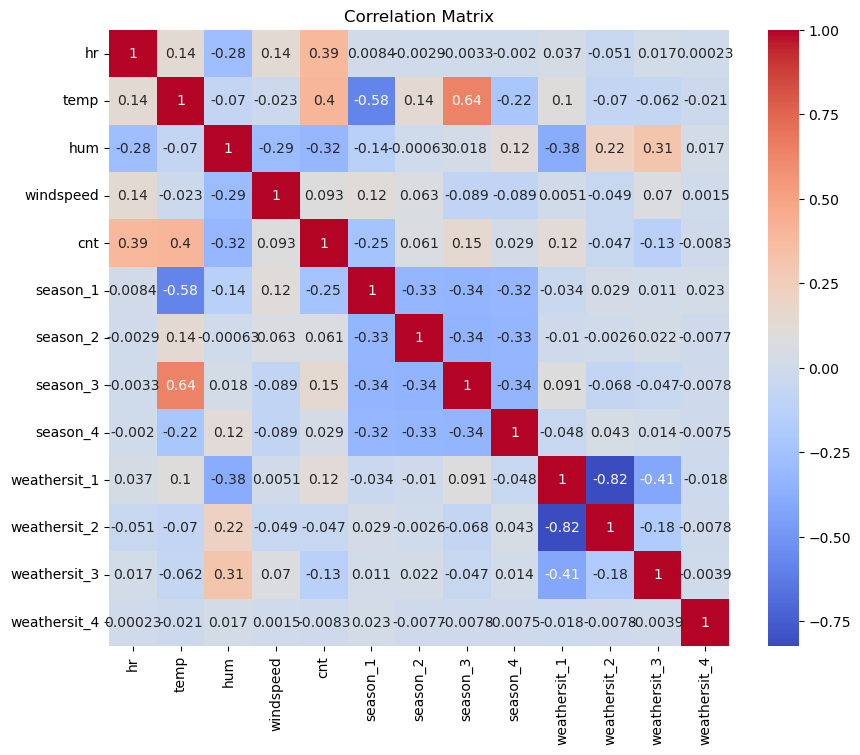

In [139]:
# Compute the correlation matrix
correlation_matrix = df_enc.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The highest correlation value in the given correlation matrix is 0.64, which corresponds to the correlation between variables 'season_3' and 'temp'. 

The lowest correlation value in the given correlation matrix is -0.58, which corresponds to the correlation between variables 'season_1' and 'temp'.

# Basic Scatterplots

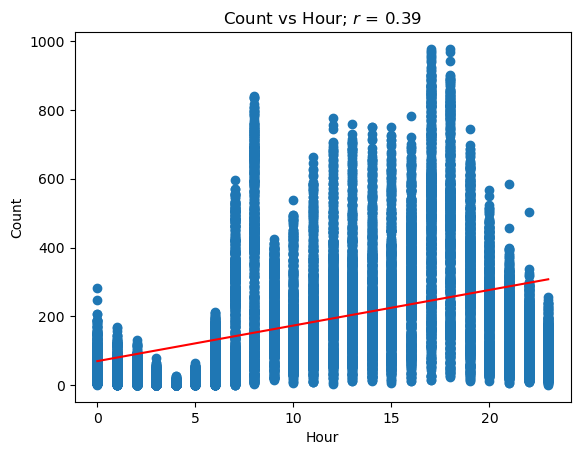

In [140]:
x = df_enc['hr'] 
y = df_enc['cnt']
plt.title('Count vs Hour')
plt.xlabel('Hour')       
plt.ylabel('Count')           

# create best-fit line based on slope-intercept form
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y) 
plt.plot(x, m*x+b, color = 'red')

# correlation coefficient 
corr = round(np.corrcoef(x, y)[0,1],2)
plt.title('Count vs Hour;' ' $\mathit{r}$ = ' + "{:.2f}".format(corr))
plt.show()

The scatter plot and correlation coefficient suggest a moderate positive correlation between the hour of the day and the count of bike rentals. The correlation coefficient of 0.39 indicates that there is a tendency for the bike count to increase as the hour of the day progresses, but the relationship is not extremely strong.

It indicates that there may be certain peak hours where the bike count is higher compared to other hours. However, it's important to note that the scatter plot and correlation coefficient alone do not provide information about the direction or causality of the relationship.

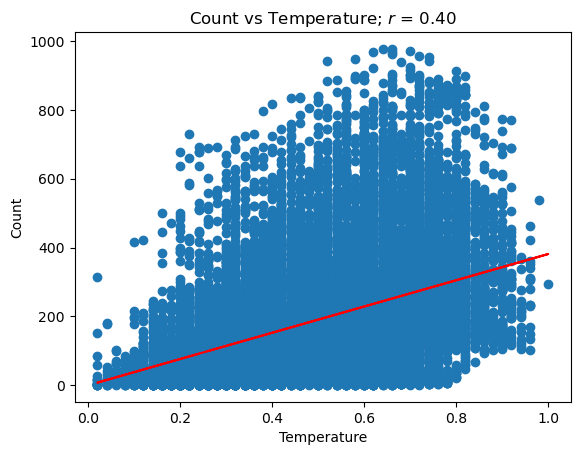

In [141]:
x = df_enc['temp'] 
y = df_enc['cnt']
plt.title('Count vs Temperature')
plt.xlabel('Temperature')       
plt.ylabel('Count')           

# create best-fit line based on slope-intercept form
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y) 
plt.plot(x, m*x+b, color = 'red')

# correlation coefficient 
corr = round(np.corrcoef(x, y)[0,1],2)
plt.title('Count vs Temperature;' ' $\mathit{r}$ = ' + "{:.2f}".format(corr))
plt.show()

The correlation coefficient between temperature and count is 0.4. This value indicates a moderate positive correlation between the two variables. It suggests that there is a tendency for the bike count to increase as the temperature increases, but the relationship is not extremely strong.

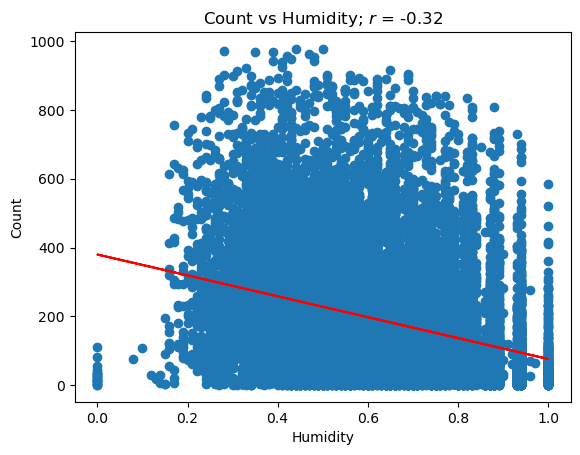

In [142]:
x = df_enc['hum'] 
y = df_enc['cnt']
plt.title('Count vs Humidity')
plt.xlabel('Humidity')       
plt.ylabel('Count')           

# create best-fit line based on slope-intercept form
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y) 
plt.plot(x, m*x+b, color = 'red')

# correlation coefficient 
corr = round(np.corrcoef(x, y)[0,1],2)
plt.title('Count vs Humidity;' ' $\mathit{r}$ = ' + "{:.2f}".format(corr))
plt.show()

 It suggest a moderate negative correlation between humidity and the count of bike rentals. The correlation coefficient of -0.32 indicates that there is a tendency for the bike count to decrease as humidity levels increase, although the relationship is not extremely strong.

The scatter plot shows the distribution of bike count values across different humidity levels. It suggests that there may be a trend where bike rentals are slightly lower during higher humidity conditions. Then again, it's important to note that the scatter plot and correlation coefficient alone do not provide information about the direction or causality of the relationship.

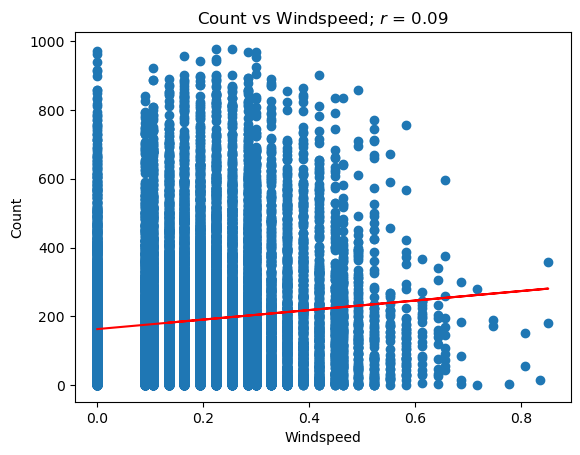

In [143]:
x = df_enc['windspeed'] 
y = df_enc['cnt']
plt.title('Count vs Windspeed')
plt.xlabel('Windspeed')       
plt.ylabel('Count')           

# create best-fit line based on slope-intercept form
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y) 
plt.plot(x, m*x+b, color = 'red')

# correlation coefficient 
corr = round(np.corrcoef(x, y)[0,1],2)
plt.title('Count vs Windspeed;' ' $\mathit{r}$ = ' + "{:.2f}".format(corr))
plt.show()

The correlation coefficient of 0.09 indicates a very weak relationship between these variables.

The scatter plot shows the distribution of bike count values across different windspeed levels. There is no clear trend or pattern visible in the plot, which aligns with the weak correlation coefficient. This suggests that windspeed has minimal impact on the count of bike rentals.

## Observation on Year

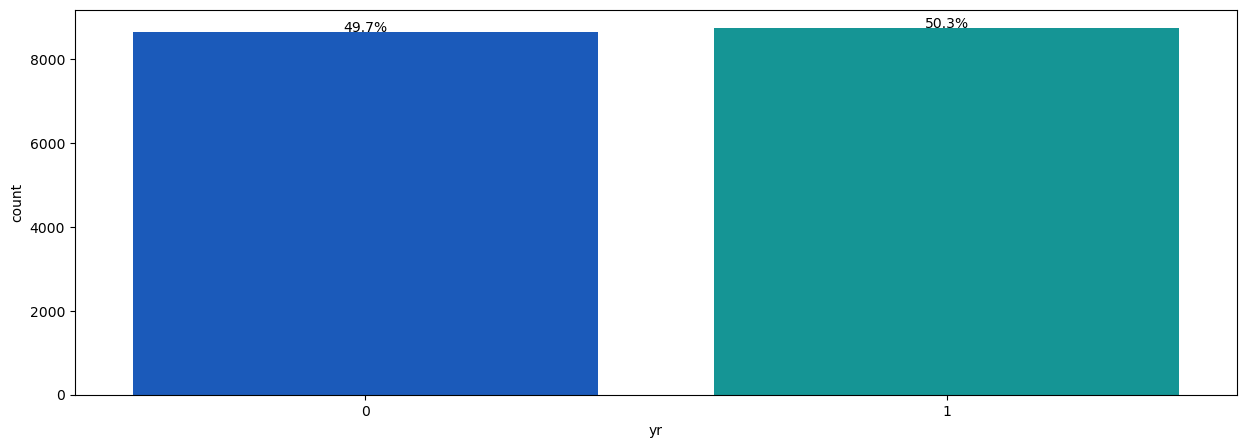

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

def perc_on_bar(ax, data):
    total = len(data)
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height/total:.1%}', (x + width/2, y + height), ha='center')

plt.figure(figsize=(15, 5))
ax = sns.countplot(data=df_enc, x="yr", palette='winter')
perc_on_bar(ax, df_enc["yr"])
plt.show()


Year 0 = 2011, Year 1 = 2012. They both seem to be evenly distributed.

## Observation on mnth

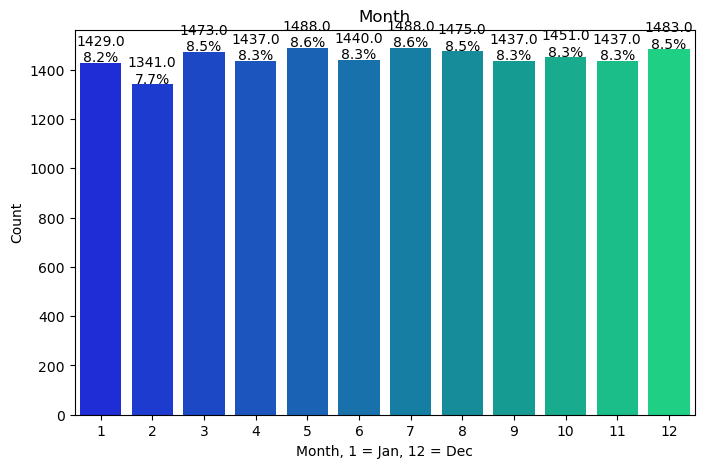

In [145]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_enc, x="mnth", palette='winter')

total = len(df["mnth"])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 5, f'{height}\n{height/total:.1%}', ha='center')

plt.xlabel("Month, 1 = Jan, 12 = Dec")
plt.ylabel("Count")
plt.title("Month")
plt.show()


The variations in the count values suggest that there are seasonal patterns in bike rental usage.

From the given count values, it appears that the months with higher counts are March, May, July, and August, while the months with lower counts are February, April, June, September, November, and December. This suggests that bike rentals tend to be more popular during the spring and summer months, possibly due to more favorable weather conditions.

These observations can be useful for understanding the demand for bike rentals throughout the year and can assist in resource planning, marketing strategies, and operational decisions related to bike-sharing systems.

## Observations on hr

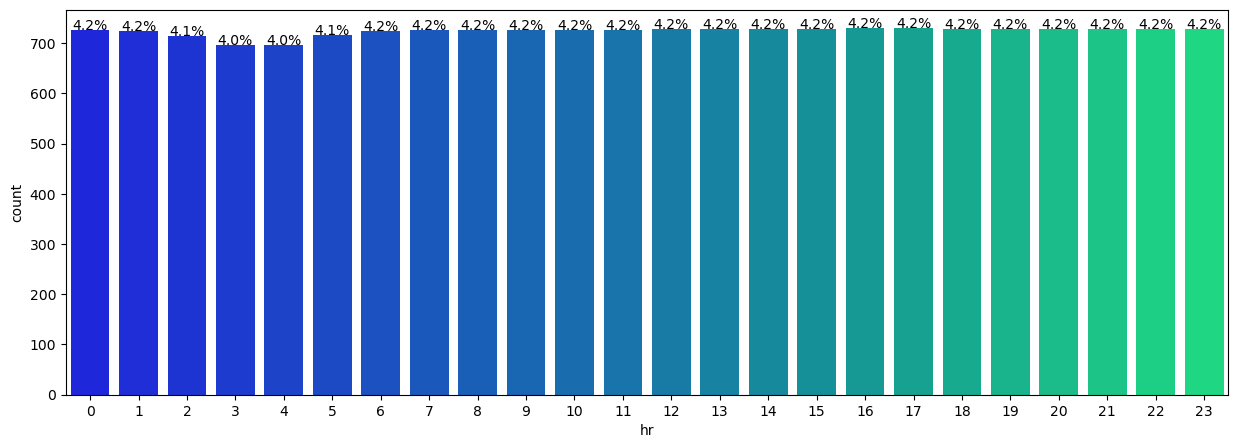

In [146]:
def perc_on_bar(ax, data):
    total = len(data)
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height/total:.1%}', (x + width/2, y + height), ha='center')

plt.figure(figsize=(15, 5))
ax = sns.countplot(data=df_enc, x="hr", palette='winter')
perc_on_bar(ax, df_enc["hr"])
plt.show()


The count values for each hour represent the number of bike rentals recorded during that specific hour of the day. 

From the given count values, we can observe certain patterns in bike rental usage throughout the day. The counts are relatively low during the early morning hours (from 0 to 5), indicating fewer bike rentals during this time. As the morning progresses and reaches the peak commuting hours (around 7 to 9), the counts start to rise, suggesting increased bike rental activity as people start their day and commute to work or other activities.

The counts remain relatively high during the daytime hours (from 9 to 17), indicating consistent bike rental demand throughout the day. However, there is a slight dip in counts during the late afternoon hours (around 16 to 18) before picking up again in the evening hours.

Towards the late evening (from 19 to 23), the counts start to decrease gradually, indicating a decline in bike rental activity as people wind down their day and return home.

These observations suggest that bike rental patterns are influenced by daily routines and commuting behaviors, with higher demand during peak commuting hours and relatively lower demand during early morning and late evening hours.

Understanding the hourly variations in bike rental counts can be valuable for managing inventory, optimizing operations, and planning promotional activities to meet the demand during specific time periods throughout the day.

## Observations on holiday

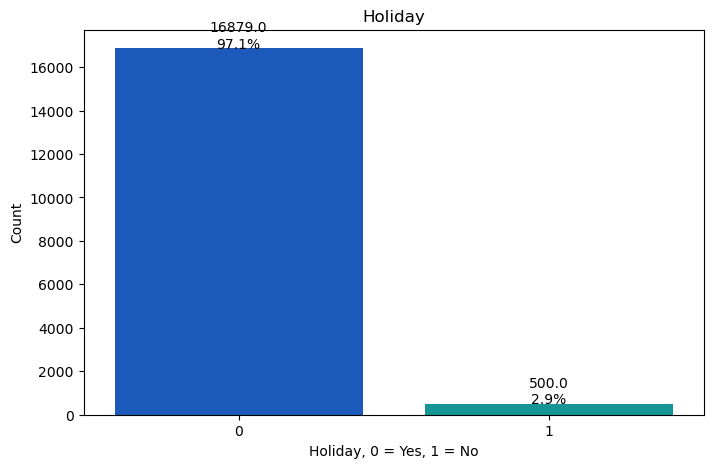

In [147]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_enc, x="holiday", palette='winter')

total = len(df["holiday"])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 5, f'{height}\n{height/total:.1%}', ha='center')

plt.xlabel("Holiday, 0 = Yes, 1 = No")
plt.ylabel("Count")
plt.title("Holiday")
plt.show()

From the given count values, we can see that the majority of the observations (16,879) correspond to non-holiday days, while a smaller number of observations (500) correspond to holiday days.

This distribution suggests that bike rentals are more prevalent on non-holiday days compared to holidays. It is likely that on non-holiday days, people use bikes for various purposes such as commuting to work, running errands, or recreational activities. On the other hand, on holidays, people may engage in different types of activities or have alternative transportation options, leading to a lower demand for bike rentals.

Understanding the difference in bike rental patterns between holiday and non-holiday days can be useful for resource planning and operational decisions. For example, during non-holiday periods, bike rental services may need to ensure an adequate supply of bikes and manage operations efficiently to meet the higher demand.

## Observations on weekday

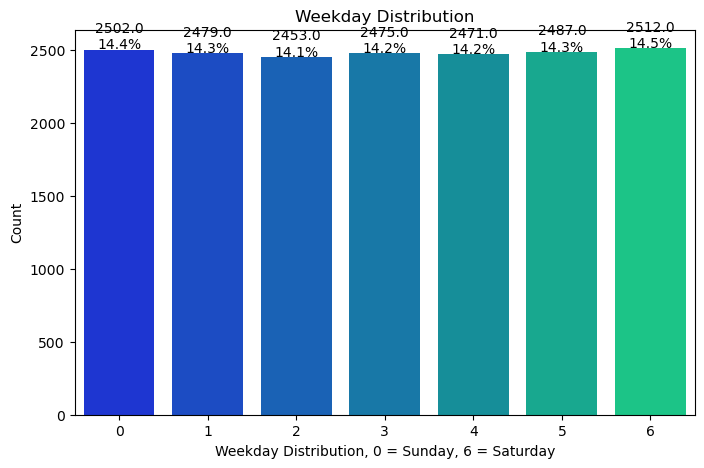

In [148]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_enc, x="weekday", palette='winter')

total = len(df["weekday"])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 5, f'{height}\n{height/total:.1%}', ha='center')

plt.xlabel("Weekday Distribution, 0 = Sunday, 6 = Saturday")
plt.ylabel("Count")
plt.title("Weekday Distribution")
plt.show()


This distribution suggests that bike rentals have a relatively consistent pattern throughout the weekdays, with slightly higher counts on weekends (Saturday and Sunday). The higher counts on weekends may be attributed to leisure activities, recreational biking, and individuals using bikes for weekend outings or events.

This variation in bike rentals across weekdays is valuable for bike-sharing service providers. It helps them allocate resources, manage bike availability, and plan operational strategies more effectively. For example, they may consider increasing bike availability and optimizing customer support on weekends to meet the higher demand during those days.

## Observations on workingday

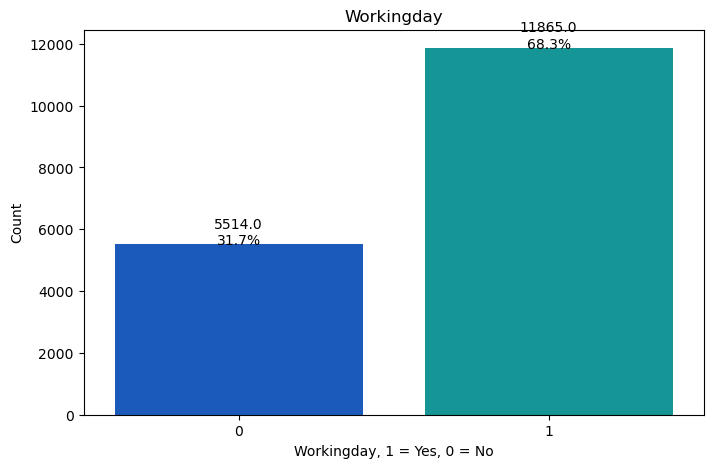

In [149]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_enc, x="workingday", palette='winter')

total = len(df["workingday"])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 5, f'{height}\n{height/total:.1%}', ha='center')

plt.xlabel("Workingday, 1 = Yes, 0 = No")
plt.ylabel("Count")
plt.title("Workingday")
plt.show()



This indicates that there are more bike rentals on working days compared to non-working days. It suggests that people tend to use bike-sharing services more frequently on working days, which could be attributed to commuting to work or other work-related activities.

The higher count of bike rentals on working days can be attributed to the larger number of working days in the dataset. It is important to consider the proportion of working days to non-working days in the dataset when interpreting the count values. In this case, since there are more working days, it is expected to see a higher count of bike rentals on those days.

This information can be valuable for bike-sharing service providers in terms of resource allocation and operational planning. They can focus their efforts on meeting the higher demand on working days, such as ensuring an adequate supply of bikes and optimizing their service availability during peak commuting hours.

## Observations on weathersit

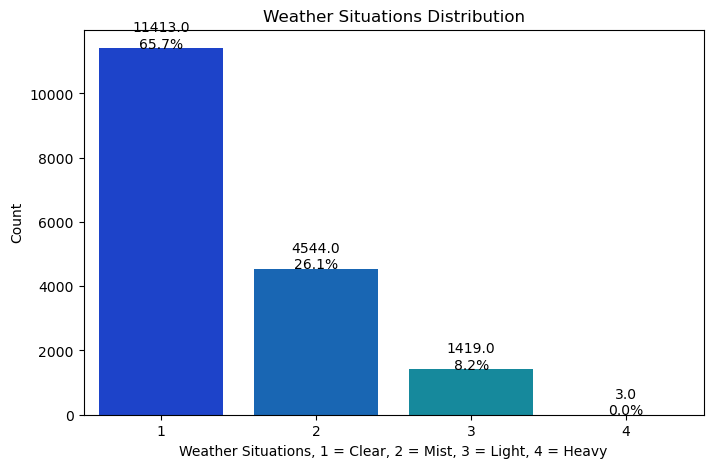

In [150]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x="weathersit", palette='winter')

total = len(df["weathersit"])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 5, f'{height}\n{height/total:.1%}', ha='center')

plt.xlabel("Weather Situations, 1 = Clear, 2 = Mist, 3 = Light, 4 = Heavy")
plt.ylabel("Count")
plt.title("Weather Situations Distribution")
plt.show()

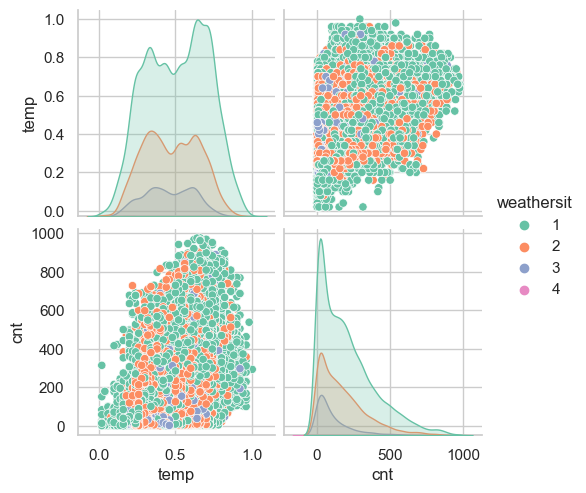

In [264]:
columns = df[['temp', 'weathersit', 'cnt']]
sns.pairplot(columns, hue='weathersit', palette='Set2')  # pairplot with Set2 color palette
plt.show()


This indicates the distribution of bike rentals based on different weather situations.

Weather situation 1: This category has the highest count, indicating that most bike rentals occur during clear or slightly cloudy weather conditions.

Weather situation 2: This category has a relatively lower count compared to situation 1, suggesting that bike rentals are slightly lower during misty or cloudy weather conditions.

Weather situation 3: This category has a lower count compared to situations 1 and 2, indicating that bike rentals decrease further during light snow or rain with scattered clouds.

Weather situation 4: This category has the lowest count, with only 3 instances. This suggests that bike rentals are extremely rare during heavy rain, ice pellets, thunderstorms, mist, or fog.

These observations suggest that weather conditions have an influence on bike rental patterns. People are more likely to rent bikes during favorable weather conditions (situation 1) and less likely to rent bikes during unfavorable or extreme weather conditions (situations 3 and 4). This information can be valuable for bike-sharing service providers in understanding the demand patterns based on weather and adjusting their operations and marketing strategies accordingly.

## Observations on Seasons

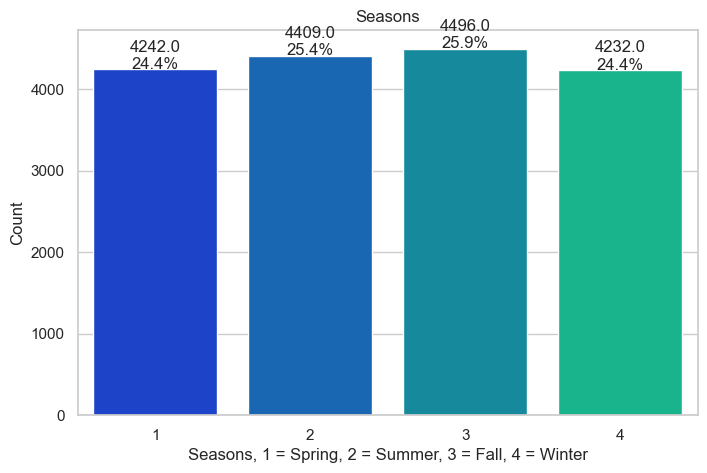

In [265]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x="season", palette='winter')

total = len(df["season"])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 5, f'{height}\n{height/total:.1%}', ha='center')

plt.xlabel("Seasons, 1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter")
plt.ylabel("Count")
plt.title("Seasons")
plt.show()




This distribution represents the number of bike rentals recorded during different seasons.

Season 3 (fall) has the highest count, indicating that bike rentals are most popular during the fall season. This could be due to favorable weather conditions, such as mild temperatures and pleasant surroundings.

Season 2 (summer) also has a relatively high count, suggesting that bike rentals are popular during the summer months when the weather is warm and people engage in outdoor activities.

Season 4 (winter) has a slightly lower count compared to seasons 2 and 3, indicating that bike rentals decrease during the winter season, possibly due to colder temperatures and less favorable riding conditions.

Season 1 (spring) has the lowest count, suggesting that bike rentals are relatively less popular during the spring season. This could be due to changing weather conditions and other factors.

These observations highlight the seasonal variations in bike rental patterns. Bike rentals tend to be highest during the fall and summer seasons, while they decrease during the winter and spring seasons. Understanding these seasonal patterns can help bike-sharing service providers optimize their operations, marketing strategies, and resource allocation based on the anticipated demand during different seasons.

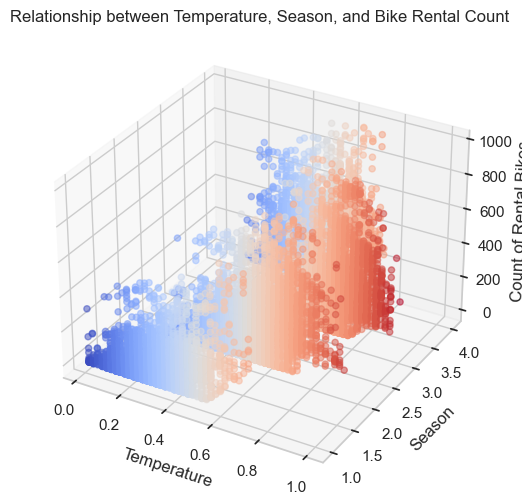

In [266]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Convert 'season' to integer type
df['season'] = df['season'].astype(int)

# Scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting the data points with different colors for 'temp' and 'season'
ax.scatter(df['temp'], df['season'], df['cnt'], c=df['temp'], cmap='coolwarm', alpha=0.5)

# Set labels and title
ax.set_xlabel('Temperature')
ax.set_ylabel('Season')
ax.set_zlabel('Count of Rental Bikes')
ax.set_title('Relationship between Temperature, Season, and Bike Rental Count')

plt.show()


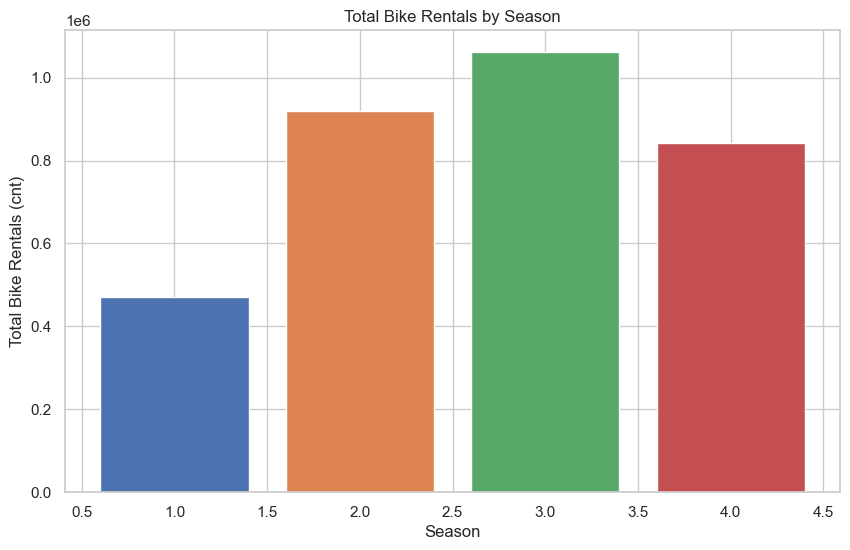

In [267]:
# Group the data by 'season'
grouped = df.groupby('season')

# Plot 'cnt' values for each season
plt.figure(figsize=(10, 6))
for season, data in grouped:
    plt.bar(season, data['cnt'].sum())

plt.xlabel('Season')
plt.ylabel('Total Bike Rentals (cnt)')
plt.title('Total Bike Rentals by Season')
plt.show()


In [268]:
import pandas as pd

# Assuming 'df' is your DataFrame
grouped = df.groupby('season')['cnt'].sum().reset_index()
total_sum = grouped['cnt'].sum()

print("Sum of 'cnt' for each value in the 'season' column:")
print(grouped)

print("\nTotal sum of 'cnt' for all values:")
print(total_sum)


Sum of 'cnt' for each value in the 'season' column:
   season      cnt
0       1   471348
1       2   918589
2       3  1061129
3       4   841613

Total sum of 'cnt' for all values:
3292679


In [269]:
import pandas as pd

# Assuming 'df' is your DataFrame
grouped1 = df.groupby('season')['cnt'].mean().reset_index()
total_mean = grouped['cnt'].mean()

print("Mean of 'cnt' for each value in the 'season' column:")
print(grouped1)

print("\nOverall mean of 'cnt' for all values:")
print(total_mean)


Mean of 'cnt' for each value in the 'season' column:
   season         cnt
0       1  111.114569
1       2  208.344069
2       3  236.016237
3       4  198.868856

Overall mean of 'cnt' for all values:
823169.75


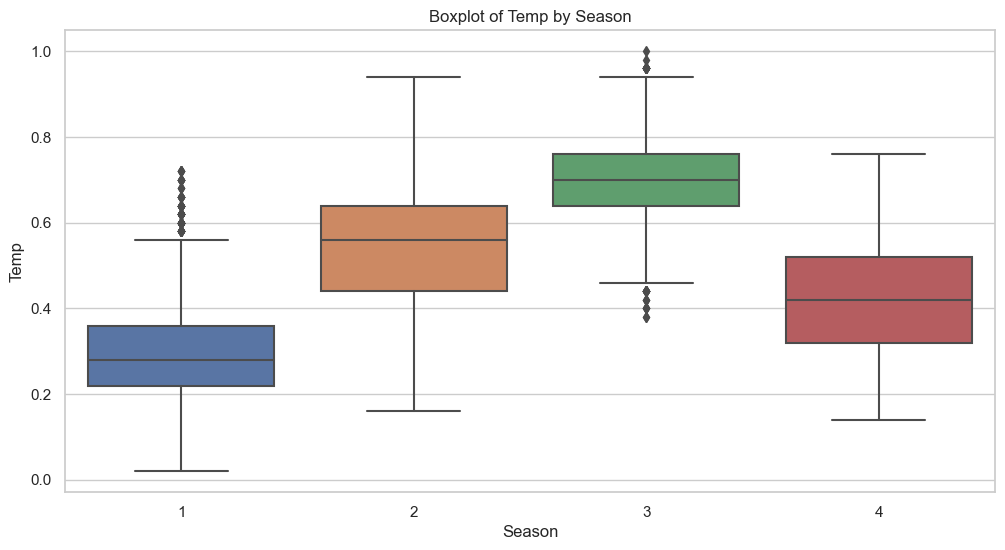

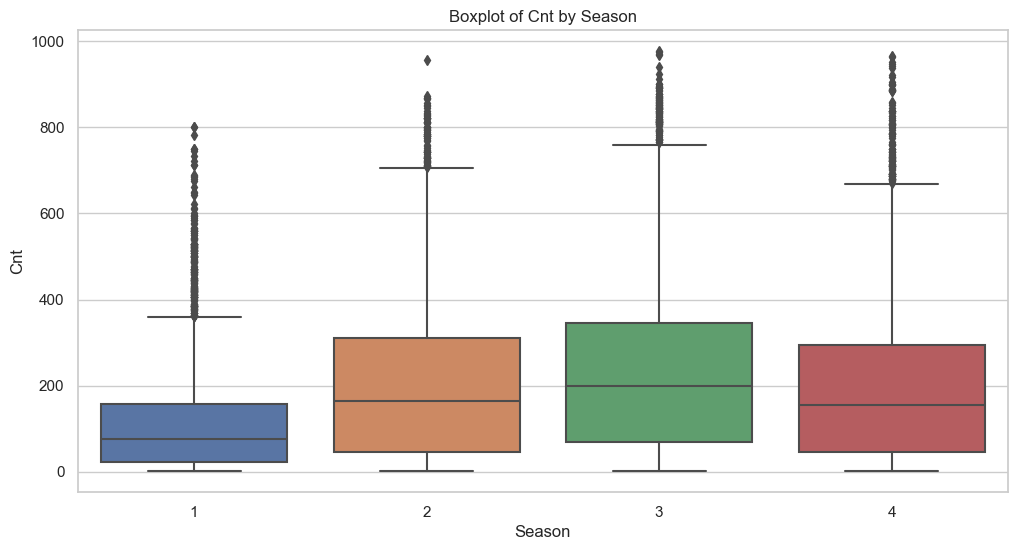

In [270]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create boxplots for 'temp', and 'cnt' grouped by 'season'
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='temp', data=df)
plt.title('Boxplot of Temp by Season')
plt.xlabel('Season')
plt.ylabel('Temp')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='cnt', data=df)
plt.title('Boxplot of Cnt by Season')
plt.xlabel('Season')
plt.ylabel('Cnt')
plt.show()


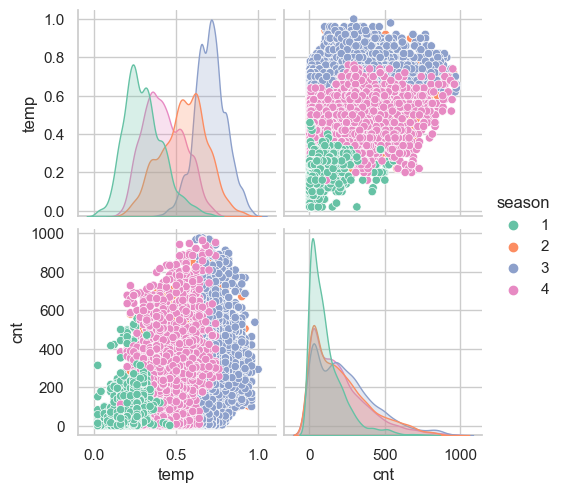

In [271]:
columns = df[['temp', 'season', 'cnt']]
sns.pairplot(columns, hue='season', palette='Set2')  # pairplot with Set2 color palette
plt.show()


## Function to create a boxplot and histogram distribution

In [272]:
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """
    Boxplot and histogram combined.

    Parameters:
    - feature: 1-D feature array
    - figsize: size of the figure (default: (15, 10))
    - bins: number of bins for histogram (default: None/auto)

    Returns:
    - None
    """

    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    sns.boxplot(feature, ax=ax_box, showmeans=True, color='violet')

    if bins:
        sns.histplot(feature, kde=False, ax=ax_hist, bins=bins, palette="winter")
    else:
        sns.histplot(feature, kde=False, ax=ax_hist)

    ax_hist.axvline(np.mean(feature), color='green', linestyle='--')
    ax_hist.axvline(np.median(feature), color='black', linestyle='-')

    plt.show()

# Observations on temp

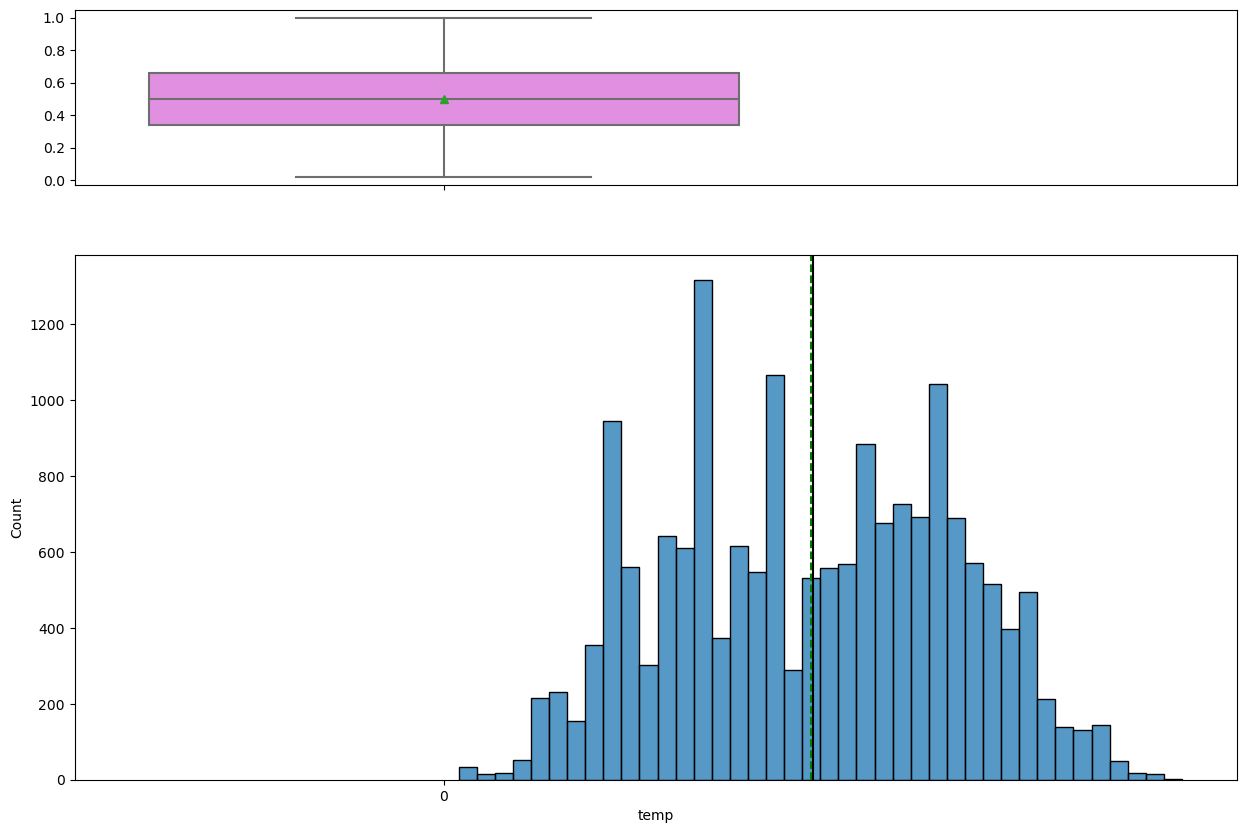

In [153]:
histogram_boxplot(df_enc["temp"])

Mean: The average temperature is approximately 0.50.
Standard Deviation: The temperature values have a standard deviation of around 0.19.
Minimum and Maximum: The minimum temperature recorded is 0.02, and the maximum temperature recorded is 1.00.
Quartiles: The first quartile (25th percentile) is at 0.34, the median (50th percentile) is at 0.50, and the third quartile (75th percentile) is at 0.66.
From these observations, we can infer that the temperature values are normalized, ranging between 0 and 1. The distribution appears to be relatively symmetric, as the mean and median values are close. The standard deviation indicates moderate variability in the temperature values.

In [154]:
# univariate analysis
X1 = df_enc['temp']
y = df_enc['cnt']

import statsmodels.api as sm # use stats models for basic linear regression
X1 = sm.add_constant(X1) # adds constant to the model
model = sm.OLS(y, X1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     3405.
Date:                Sat, 24 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:35:43   Log-Likelihood:            -1.1349e+05
No. Observations:               17379   AIC:                         2.270e+05
Df Residuals:                   17377   BIC:                         2.270e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0356      3.483     -0.010      0.992      -6.862       6.791
temp         381.2949      6.534     58.352      0.000     368.487     394.103
==============================================================================
Omnibus:                     3140.760   Durbin-Watson:                   0.368
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5634.907
Skew:                           1.152   Prob(JB):                         0.00
Kurtosis:                       4.572   Cond. No.                         6.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared value of 0.164 suggests that approximately 16.4% of the variation in the count can be explained by changes in temperature alone. This indicates a relatively weak relationship between temperature and count. The coefficient for 'temp' is 381.2949, suggesting that for every one-unit increase in temperature, the count is expected to increase by approximately 381. However, it's important to note that the constant term is not statistically significant, suggesting that there may be other factors not included in the model that influence the count. Overall

# Observations on humidity

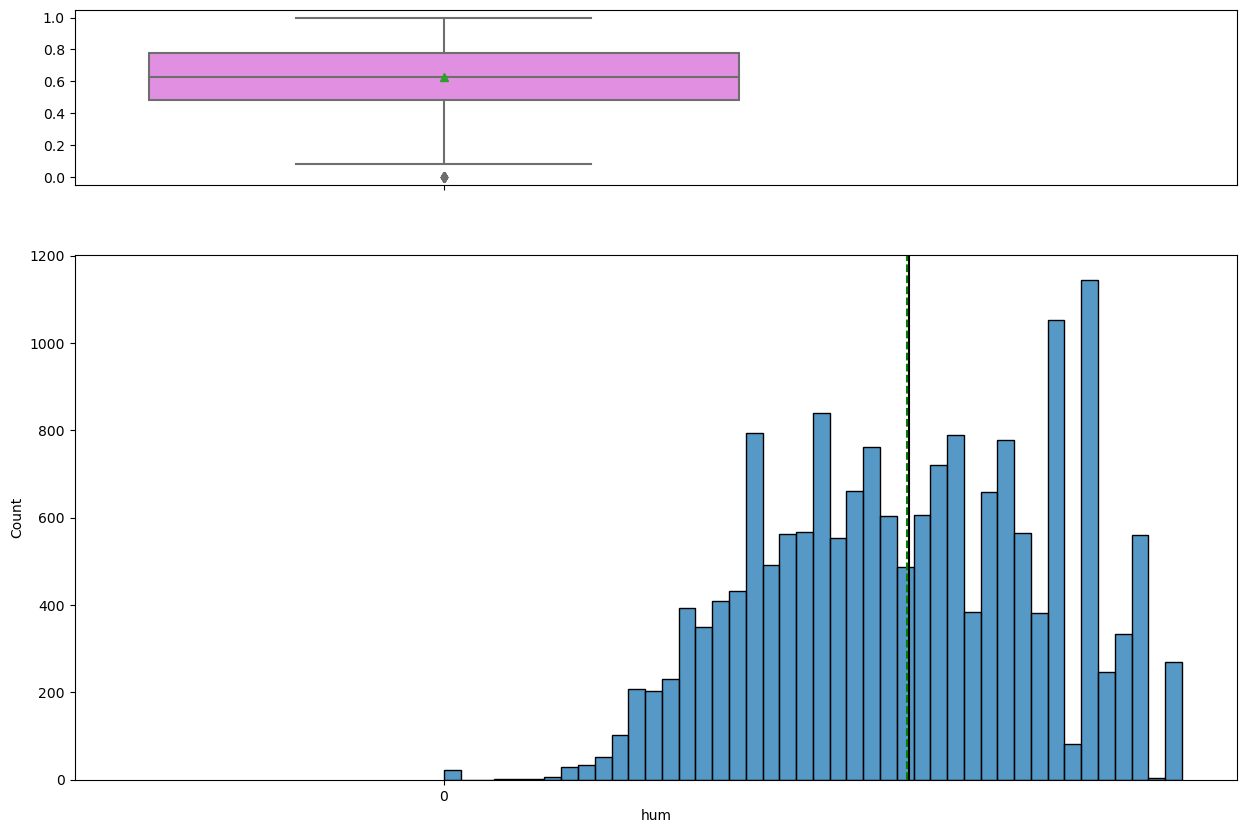

In [155]:
histogram_boxplot(df_enc["hum"])

Mean: The average humidity is approximately 0.63.
Standard Deviation: The humidity values have a standard deviation of around 0.19.
Minimum and Maximum: The minimum humidity recorded is 0.00, and the maximum humidity recorded is 1.00.
Quartiles: The first quartile (25th percentile) is at 0.48, the median (50th percentile) is at 0.63, and the third quartile (75th percentile) is at 0.78.
From these observations, we can infer that the humidity values are also normalized, ranging between 0 and 1. The distribution appears to be relatively symmetric, as the mean and median values are close. The standard deviation indicates moderate variability in the humidity values.

In [156]:
# univariate analysis
X1 = df_enc['hum']
y = df_enc['cnt']

import statsmodels.api as sm # use stats models for basic linear regression
X1 = sm.add_constant(X1) # adds constant to the model
model = sm.OLS(y, X1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     2023.
Date:                Sat, 24 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:35:51   Log-Likelihood:            -1.1408e+05
No. Observations:               17379   AIC:                         2.282e+05
Df Residuals:                   17377   BIC:                         2.282e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        379.8849      4.430     85.761      0.000     371.202     388.567
hum         -303.5923      6.750    -44.976      0.000    -316.823    -290.361
==============================================================================
Omnibus:                     3480.028   Durbin-Watson:                   0.348
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6472.551
Skew:                           1.250   Prob(JB):                         0.00
Kurtosis:                       4.639   Cond. No.                         7.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The OLS regression results show that the model predicts the 'cnt' (count) variable using the 'hum' (humidity) variable. The R-squared value of 0.104 indicates that approximately 10.4% of the variation in count can be explained by changes in humidity alone. The coefficient for 'hum' is -303.5923, suggesting that for every one-unit increase in humidity, the count is expected to decrease by approximately 303. The constant term is statistically significant, with a coefficient of 379.8849, indicating that it has an independent effect on the count. The additional statistics, such as the F-statistic, AIC, BIC, Omnibus, Durbin-Watson, Jarque-Bera, skewness, and kurtosis, provide further insights into the model's performance and assumptions. Overall, the model suggests that humidity has a statistically significant impact on the count, but it only explains a relatively small portion of the total variation in the count.

## Observations on windspeed

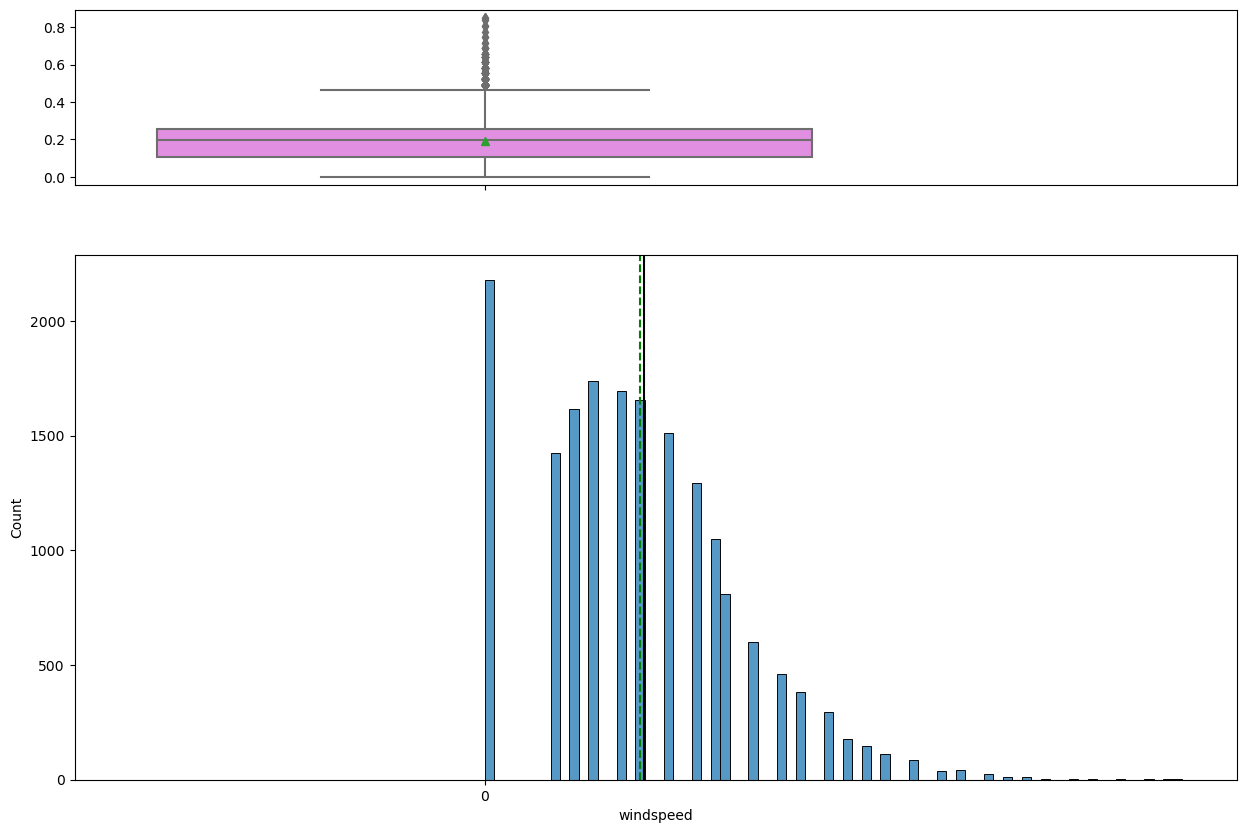

In [157]:
histogram_boxplot(df_enc["windspeed"])

Mean: The average windspeed is approximately 0.19.
Standard Deviation: The windspeed values have a standard deviation of around 0.12.
Minimum and Maximum: The minimum windspeed recorded is 0.00, and the maximum windspeed recorded is 0.85.
Quartiles: The first quartile (25th percentile) is at 0.10, the median (50th percentile) is at 0.19, and the third quartile (75th percentile) is at 0.25.
From these observations, we can see that the windspeed values are also normalized, ranging between 0 and 0.85. The distribution appears to be right skewed, eventhough the mean and median values are close, which suggests that the distribution of the variable is relatively symmetric. The standard deviation indicates moderate variability in the windspeed values.

In [158]:
# univariate analysis
X1 = df_enc['windspeed']
y = df_enc['cnt']

import statsmodels.api as sm # use stats models for basic linear regression
X1 = sm.add_constant(X1) # adds constant to the model
model = sm.OLS(y, X1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     152.4
Date:                Sat, 24 Jun 2023   Prob (F-statistic):           7.35e-35
Time:                        17:36:01   Log-Likelihood:            -1.1497e+05
No. Observations:               17379   AIC:                         2.299e+05
Df Residuals:                   17377   BIC:                         2.299e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        163.1853      2.532     64.462      0.000     158.223     168.147
windspeed    138.2330     11.198     12.344      0.000     116.283     160.183
==============================================================================
Omnibus:                     3479.018   Durbin-Watson:                   0.317
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6247.991
Skew:                           1.280   Prob(JB):                         0.00
Kurtosis:                       4.442   Cond. No.                         8.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The OLS regression results indicate that the relationship between windspeed and the dependent variable (cnt) is weak, as the R-squared value is only 0.009. The coefficient for windspeed is statistically significant (p < 0.001), suggesting that it has a small effect on the bike rental count. However, the model exhibits non-normality, positive autocorrelation, and potential omitted variable bias. Overall, the model's explanatory power is limited, and other factors may have a more substantial impact on the bike rental count.

## Multivariate Analysis

### Count Distribution by Season and Weather Situations

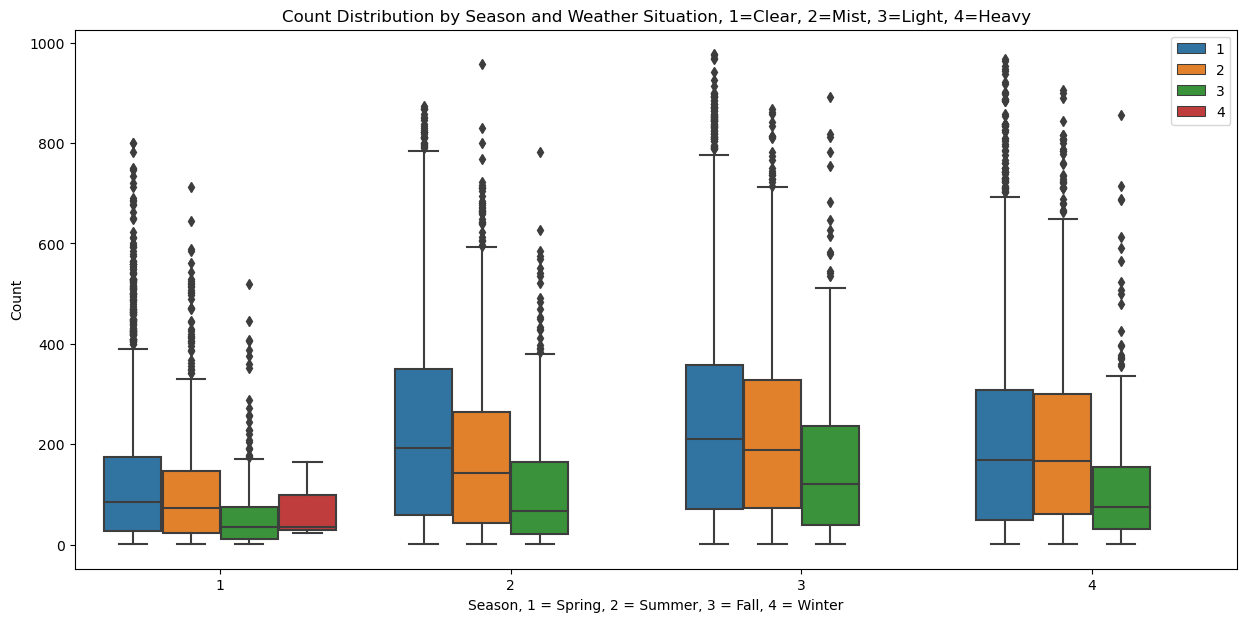

In [159]:

plt.figure(figsize=(15, 7))
sns.boxplot(x=df["season"], y=df_enc["cnt"], hue=df["weathersit"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.xlabel("Season, 1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter")
plt.ylabel("Count")
plt.title("Count Distribution by Season and Weather Situation, 1=Clear, 2=Mist, 3=Light, 4=Heavy")
plt.show()


The median count of bike rentals varies across different seasons and weather situations. These boxes provide information about the range of counts within each combination.

The outliers indicate the presence of data points that lie significantly outside the typical range of values for a particular combination of season and weather situation. These outliers are shown as individual points outside the whiskers in the boxplot.

# Multiple Variable Regression

In [229]:
# assign independent variables, dependent variable, respectively
x = df_enc[['temp', 'hum']]
# define the target
y = pd.DataFrame(df_enc['cnt'])


In [230]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, 
                                                    random_state=42)

In [231]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 12165
Number of rows in test data = 5214


## Fitting a linear model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     2026.
Date:                Sat, 24 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:59:19   Log-Likelihood:                -78879.
No. Observations:               12165   AIC:                         1.578e+05
Df Residuals:                   12162   BIC:                         1.578e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        188.1233      6.353     29.610      0.0

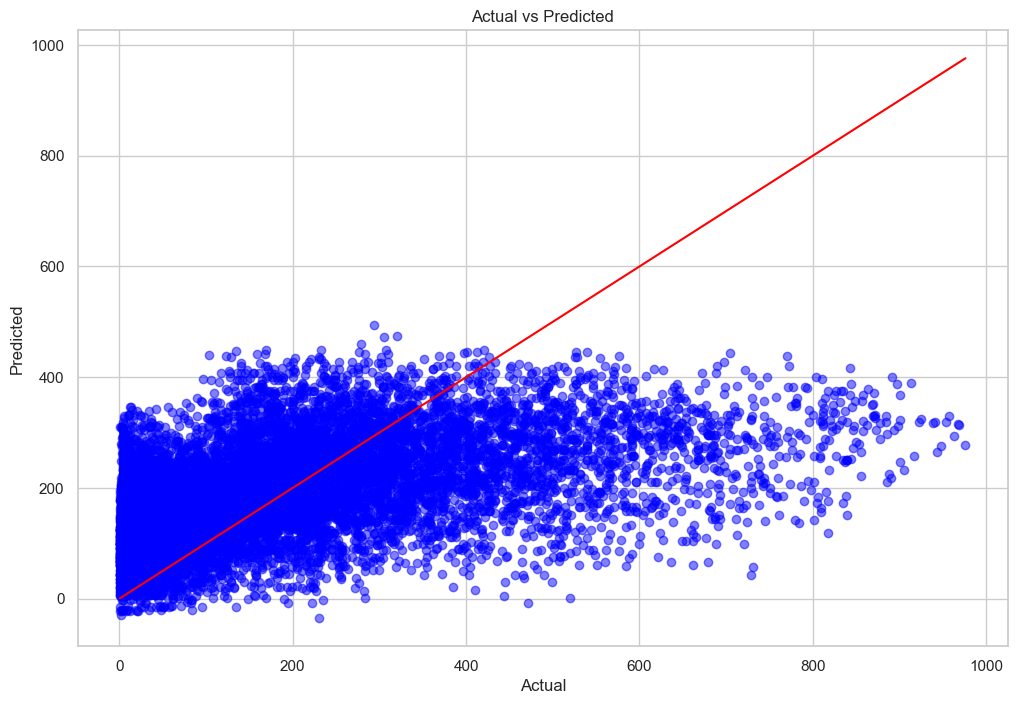

In [232]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Add constant to x_train
x_train = sm.add_constant(x_train)

# Fit the OLS model
model = sm.OLS(y_train, x_train).fit()

# Summary of the model
print(model.summary())

# Plot the regression results
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot of actual vs predicted values
ax.scatter(y_train, model.fittedvalues, color='blue', alpha=0.5)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red')

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Actual vs Predicted')

plt.show()


The model explains approximately 25.0% of the variance in the bike count ('cnt'), as indicated by the R-squared value of 0.250.
Both 'temp' and 'hum' have statistically significant relationships with the bike count, as their coefficients have p-values close to zero.
An increase in temperature ('temp') is associated with an average increase of 360.2150 in the bike count, assuming other variables are held constant.
An increase in humidity ('hum') is associated with an average decrease of 280.9586 in the bike count, assuming other variables are held constant.
The F-statistic of 2026 suggests that the overall model is statistically significant.
The Durbin-Watson statistic of 2.011 indicates no significant autocorrelation in the model.
The model suggests that higher temperatures tend to increase the bike count, while higher humidity tends to decrease it.

Overall, the regression analysis highlights the importance of temperature and humidity in predicting the bike count. Higher temperatures positively affect the bike count, while higher humidity has a negative impact.

### Multiple Linear Regression with Scikit-Learn

In [233]:
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, 
                                                    random_state=42)

sk_model = LinearRegression()

sk_model.fit(x_train, y_train)

print('Model Coefficients:', sk_model.coef_)
print()
print('Intercept:', sk_model.intercept_)

coef = pd.DataFrame(sk_model.coef_.T, columns=['Coefficients'])
cols = pd.DataFrame(x.columns, columns=['Columns'])
joined = pd.concat([cols['Columns'], coef['Coefficients']], axis=1)
joined 


Model Coefficients: [[ 360.21504456 -280.95863701]]

Intercept: [188.12328309]


,Columns,Coefficients
0,temp,360.215045
1,hum,-280.958637


In [234]:
predictions = sk_model.predict(x_test)
pd.DataFrame(predictions, columns=['Predictions'])

,Predictions
0,400.436487
1,159.381853
2,117.959397
3,322.992527
4,124.442358
...,...
5209,337.401128
5210,221.050304
5211,383.578969
5212,184.383233


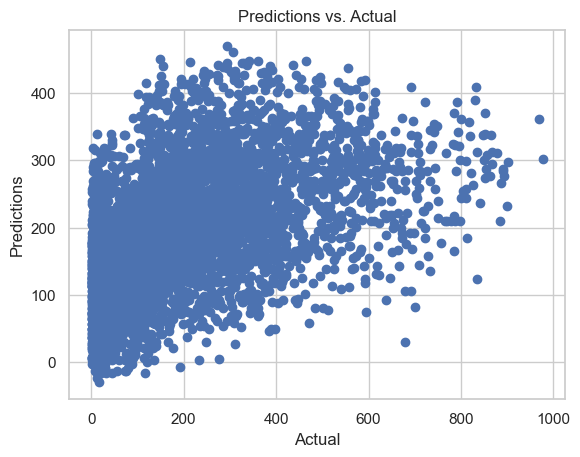

In [235]:
plt.scatter(y_test, predictions)
plt.title('Predictions vs. Actual')
plt.xlabel('Actual')
plt.ylabel('Predictions')
plt.show()

## Checking the Linear Regression Assumption

1. No Multicollinearity

2. Mean of residuals should be 0

3. No Heteroscedasticity

4. Linearity of variables

5. Normality of error terms

### Checking Assumption 1: No Multicollinearity

We will use VIF, to check if there is multicollinearity in the data.

Features having a VIF score >5 will be dropped/treated till all the features have a VIF score <5

In [236]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]
    
    return vif

# Check VIF
print(checking_vif(x_train))


  feature       VIF
0    temp  4.538927
1     hum  4.538927


In the table, features with VIF values less than 5 are generally considered to have acceptable levels of multicollinearity. However, features with VIF values equal to or greater than infinity (inf) indicate perfect multicollinearity, which means they are linearly dependent on other features in the dataset. This can cause issues in the regression analysis.

The VIF (Variance Inflation Factor) measures the multicollinearity between predictor variables in a regression model. A VIF value of 4.538927 indicates a moderate level of multicollinearity between the "temp" and "hum" variables. Generally, VIF values below 5 are considered acceptable.

This suggests that the "temp" and "hum" variables are moderately correlated with each other, which can affect the interpretation of their individual coefficients. It may be worth considering ways to address multicollinearity in your model, such as removing one of the correlated variables or exploring dimensionality reduction techniques like Principal Component Analysis (PCA) to create orthogonal variables.

Fit a model with less multicolinearity

In [237]:
import statsmodels.api as sm
x_train = sm.add_constant(x_train)
model1 = sm.OLS(y_train, x_train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     2026.
Date:                Sat, 24 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:59:27   Log-Likelihood:                -78879.
No. Observations:               12165   AIC:                         1.578e+05
Df Residuals:                   12162   BIC:                         1.578e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        188.1233      6.353     29.610      0.000     175.669     200.577
temp         360.2150      7.461     48.282      0.000     345.591     374.839
hum         -280.9586      7.452    -37.704      0.000    -295.565    -266.352
==============================================================================
Omnibus:                     2488.300   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4939.796
Skew:                           1.232   Prob(JB):                         0.00
Kurtosis:                       4.916   Cond. No.                         8.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Check Assumption 2: Residuals should be 0

In [238]:
residuals = model1.resid
np.mean(residuals)

-4.829704704852541e-14

Mean of redisuals is very close to 0. The second assumption is also satisfied.

## Checking Assumption 3: No Heteroscedasticity

In [239]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residuals, x_train)
lzip(name, test)

[('F statistic', 1.037144125939171), ('p-value', 0.07755048695569593)]

Since p-value > 0.05 we cannot reject the Null Hypothesis that the residuals are homoscedastic.

Assumptions 3 is also satisfied by our model1.

## Checking Assumption 4: Linearity of variables

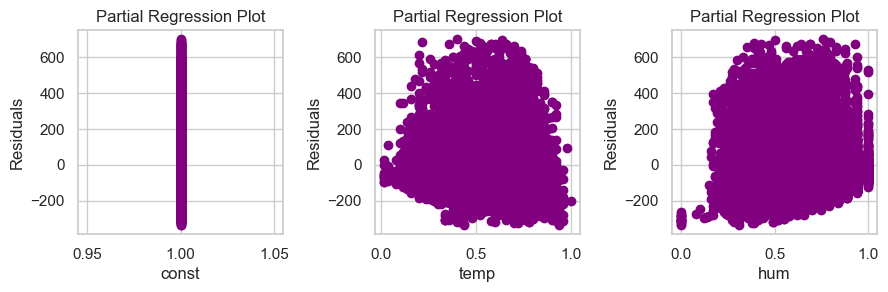

In [240]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Fit the linear regression model
model = sm.OLS(y_train, x_train)
model_fit = model.fit()

# Extract the residuals
residuals = model_fit.resid

# Create partial regression plots
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Loop through each feature and create a partial regression plot
for i, feature_name in enumerate(x_train.columns):
    ax = plt.subplot(3, 4, i+1)
    plt.scatter(x_train[feature_name], residuals, color="purple")
    plt.xlabel(feature_name)
    plt.ylabel("Residuals")
    plt.title("Partial Regression Plot")

plt.tight_layout()
plt.show()


C:\Users\eterp\AppData\Local\Temp\ipykernel_30840\753425079.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: ylabel='Density'>

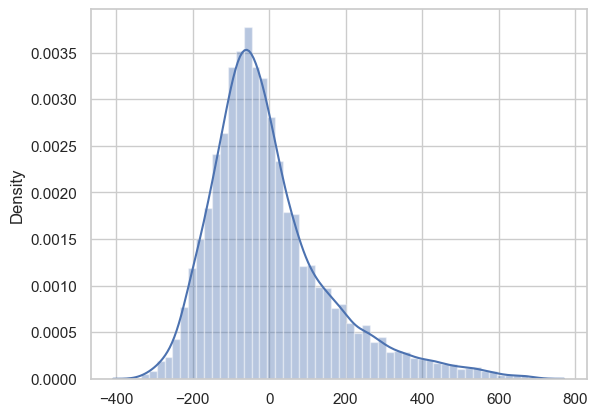

In [241]:
# Plot histogram of residuals
sns.distplot(residuals)

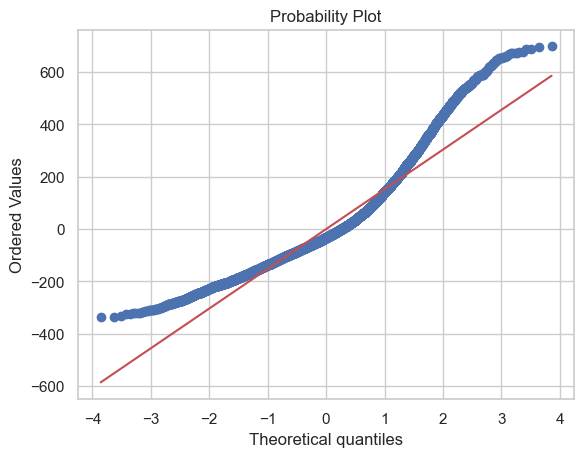

In [243]:
# Plot q-q plot of residuals
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
plt.show()

In [244]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     2026.
Date:                Sat, 24 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:59:52   Log-Likelihood:                -78879.
No. Observations:               12165   AIC:                         1.578e+05
Df Residuals:                   12162   BIC:                         1.578e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        188.1233      6.353     29.610      0.0

Based on the provided OLS regression results, we can draw the following business recommendations:

1. Temperature (temp): The coefficient for temperature is 360.2150, indicating that there is a positive relationship between temperature and the bike rental count. This means that as the temperature increases, the bike rental count tends to increase as well. Therefore, it would be beneficial for the business to focus on promoting bike rentals during warmer seasons or when the temperature is higher.

2. Humidity (hum): The coefficient for humidity is -280.9586, indicating a negative relationship between humidity and the bike rental count. This suggests that as humidity increases, the bike rental count tends to decrease. It might be helpful for the business to consider strategies to mitigate the impact of high humidity on bike rentals, such as providing indoor or covered bike parking facilities or offering additional incentives during periods of high humidity.

3. Constant Term: The constant term (intercept) is 188.1233. This represents the estimated bike rental count when both temperature and humidity are zero. However, since it is not practically possible for temperature and humidity to be zero in most scenarios, the constant term might not have direct interpretability in this context.

Overall, the recommendations would be to focus on promoting bike rentals during warmer temperature periods and to address the potential impact of high humidity on bike rental demand. Additionally, it is essential to consider other factors beyond temperature and humidity that could influence bike rental count for a more comprehensive understanding and targeted business strategies.

# Conduct an ANOVA test on the data

In [251]:
from scipy import stats

# Select the data for each season
season1 = df[df['season'] == 1]['cnt']
season2 = df[df['season'] == 2]['cnt']
season3 = df[df['season'] == 3]['cnt']
season4 = df[df['season'] == 4]['cnt']

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(season1, season2, season3, season4)

# Print the results
print("ANOVA results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)


ANOVA results:
F-statistic: 409.1810372630525
p-value: 7.40107139971279e-257


The ANOVA test results indicate a significant relationship between the 'season' variable and the 'cnt' variable. The F-statistic is 409.1810372630525, and the p-value is very small (7.40107139971279e-257), suggesting strong evidence against the null hypothesis of no association.

This indicates that the 'season' variable has a significant impact on the 'cnt' variable, and there are likely differences in the mean counts of bike rentals across different seasons.

# Conduct a t test:
H0: There is no significant difference in the mean bike rental counts between the seasons.

Rejecting the null hypothesis would indicate that there is a significant difference in the mean bike rental counts between at least one pair of seasons.

In [252]:
import scipy.stats as stats

# Define the seasons and corresponding subsets of 'cnt' variable
seasons = df['season'].unique()

# Perform pairwise t-tests between each season and 'cnt'
for season in seasons:
    season_data = df[df['season'] == season]['cnt']
    _, p_value = stats.ttest_ind(season_data, df['cnt'])
    print(f"Season: {season} | p-value: {p_value}")


Season: 1 | p-value: 3.4509642647585406e-155
Season: 2 | p-value: 9.24999633777696e-10
Season: 3 | p-value: 6.144586704479224e-51
Season: 4 | p-value: 0.0025315864887008985


With a significance level of 95% (α = 0.05), we compare the obtained p-values with the chosen significance level to determine the statistical significance. 

Based on the t-tests conducted, the p-values are as follows:

Season 1 vs 'cnt': p-value = 3.4509642647585406e-155 (significant)
Season 2 vs 'cnt': p-value = 9.24999633777696e-10 (significant)
Season 3 vs 'cnt': p-value = 6.144586704479224e-51 (significant)
Season 4 vs 'cnt': p-value = 0.0025315864887008985 (significant)

Since all p-values are much smaller than the significance level of 0.05, we can conclude that there is strong evidence to reject the null hypothesis. This means that there is a statistically significant difference between each season and the 'cnt' variable at the 95% confidence level.

In other words, we can confidently state that the different seasons have a significant impact on the bike rental counts.